# Additional figures to monitor sea level

In [2]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import local_functions as loc

# For higher resolution images on retina display screens
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [3]:
region = 'Netherlands' # Choose from 'Netherlands', 'Belgium', 'Vlissingen', 'Hoek van Holland', 'Den Helder', 'Delfzijl', 'Harlingen', 'IJmuiden'
bootsize = 1000 # Choose from 100, 1000, 10000
output_dir = f'./outputs/'

### Read rates data

In [71]:
output_dir = f'./outputs/{region}/'

if os.path.exists(output_dir)==False:
    os.makedirs(output_dir)

if os.path.exists(output_dir+str(bootsize))==False:
    os.makedirs(output_dir+str(bootsize))

In [72]:
tg_df = pd.read_csv(f'{output_dir}data_tide_gauges.csv')

res_nr = pd.read_csv(f'{output_dir}results_NoRegressor.csv')
res_nt = pd.read_csv(f'{output_dir}results_NodalTide.csv')
res_na = pd.read_csv(f'{output_dir}results_NearestPointAverage2.csv')
res_pd = pd.read_csv(f'{output_dir}results_PressureDifference.csv')

for df in [tg_df, res_nr, res_nt, res_na, res_pd]:
    df.set_index('time', inplace=True)

In [73]:
rates_nr = pd.read_csv(f'{output_dir}{bootsize}/rates_NoRegressor.csv')
rates_nt = pd.read_csv(f'{output_dir}{bootsize}/rates_NodalTide.csv')
rates_na = pd.read_csv(f'{output_dir}{bootsize}/rates_NearestPointAverage2.csv')
rates_pd = pd.read_csv(f'{output_dir}{bootsize}/rates_PressureDifference.csv')

rates_q_nr = pd.read_csv(f'{output_dir}{bootsize}/rates_quantiles_NoRegressor.csv')
rates_q_nt = pd.read_csv(f'{output_dir}{bootsize}/rates_quantiles_NodalTide.csv')
rates_q_na = pd.read_csv(f'{output_dir}{bootsize}/rates_quantiles_NearestPointAverage2.csv')
rates_q_pd = pd.read_csv(f'{output_dir}{bootsize}/rates_quantiles_PressureDifference.csv')

for df in [rates_nr, rates_nt, rates_na, rates_pd,
           rates_q_nr, rates_q_nt, rates_q_na, rates_q_pd,]:
    df.set_index('time', inplace=True)

In [74]:
# Compute the standard errors in rates

ser_nr = rates_nr.std(axis=1)
ser_nt = rates_nt.std(axis=1)
ser_na = rates_na.std(axis=1)
ser_pd = rates_pd.std(axis=1)

In [75]:
long_names = ['Trend only', 
              'Trend and nodal tide', 
              'Trend, nodal tide and wind (velocity)', 
              'Trend, nodal tide and wind (pressure)']

short_names = ['$\it{Tr}$', '$\it{TrNt}$', '$\it{TrNtW}$', '$\it{TrNtPd}$']

comb_names = [f'{short_names[i]} : {long_names[i]}' for i in range(4)]

In [76]:
(rates_q_na['0.5'][2000]-rates_q_na['0.5'][1975])/25

0.05267854718089908

## Figures

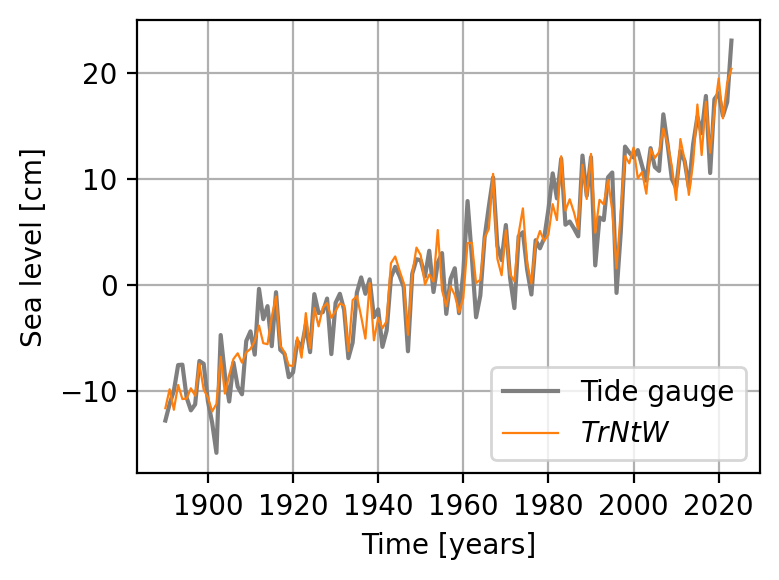

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(4,3)) #14,5

panels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

colors = ['tab:green', 'tab:red', 'tab:orange', 'tab:blue']

tg_df['Average'].plot(label='Tide gauge', color='tab:grey')
res_na.total.plot(label=short_names[2], color=colors[2], linewidth=0.8)

ax.set_ylabel('Sea level [cm]')

ax.set_xticks(np.arange(1900,2021,20))
ax.grid(axis='x', which='major')
ax.grid(axis='y', which='major')
ax.set_xlabel('Time [years]')
#ax.text(0.01, 0.92, panels[idx], transform=ax.flat[idx].transAxes, size=14)

ax.legend(loc='lower right')

    
fig.tight_layout()

plt.savefig(f'./figures/{region}/TideGauge_StatModels_W_simpler.pdf', dpi=150)


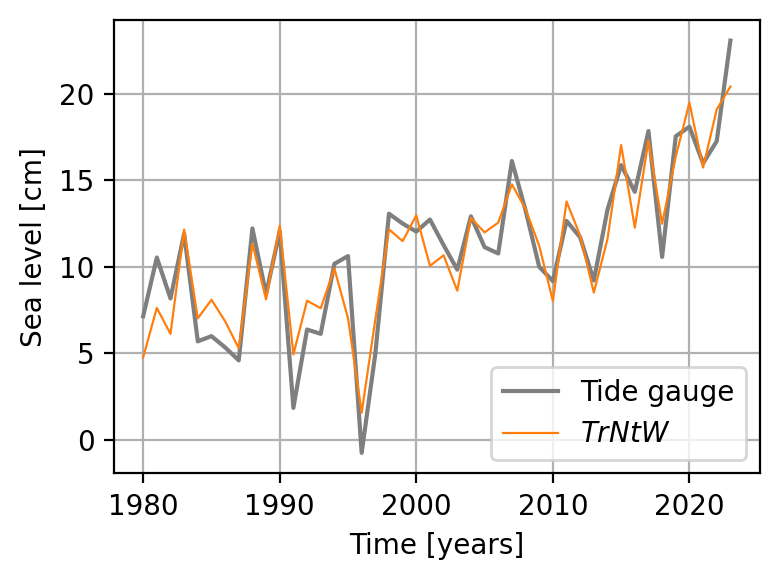

In [78]:
start_date = 1980

fig, ax = plt.subplots(1, 1, figsize=(4,3)) #14,5

panels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

colors = ['tab:green', 'tab:red', 'tab:orange', 'tab:blue']

tg_df.loc[start_date:,'Average'].plot(label='Tide gauge', color='tab:grey')
res_na.loc[start_date:, 'total'].plot(label=short_names[2], color=colors[2], linewidth=0.8)

ax.set_ylabel('Sea level [cm]')

#ax.set_xticks(np.arange(1900,2021,20))
ax.grid(axis='x', which='major')
ax.grid(axis='y', which='major')
ax.set_xlabel('Time [years]')
#ax.text(0.01, 0.92, panels[idx], transform=ax.flat[idx].transAxes, size=14)

ax.legend(loc='lower right')

    
fig.tight_layout()

plt.savefig(f'./figures/{region}/TideGauge_StatModels_W_zoom_simpler.pdf', dpi=150)

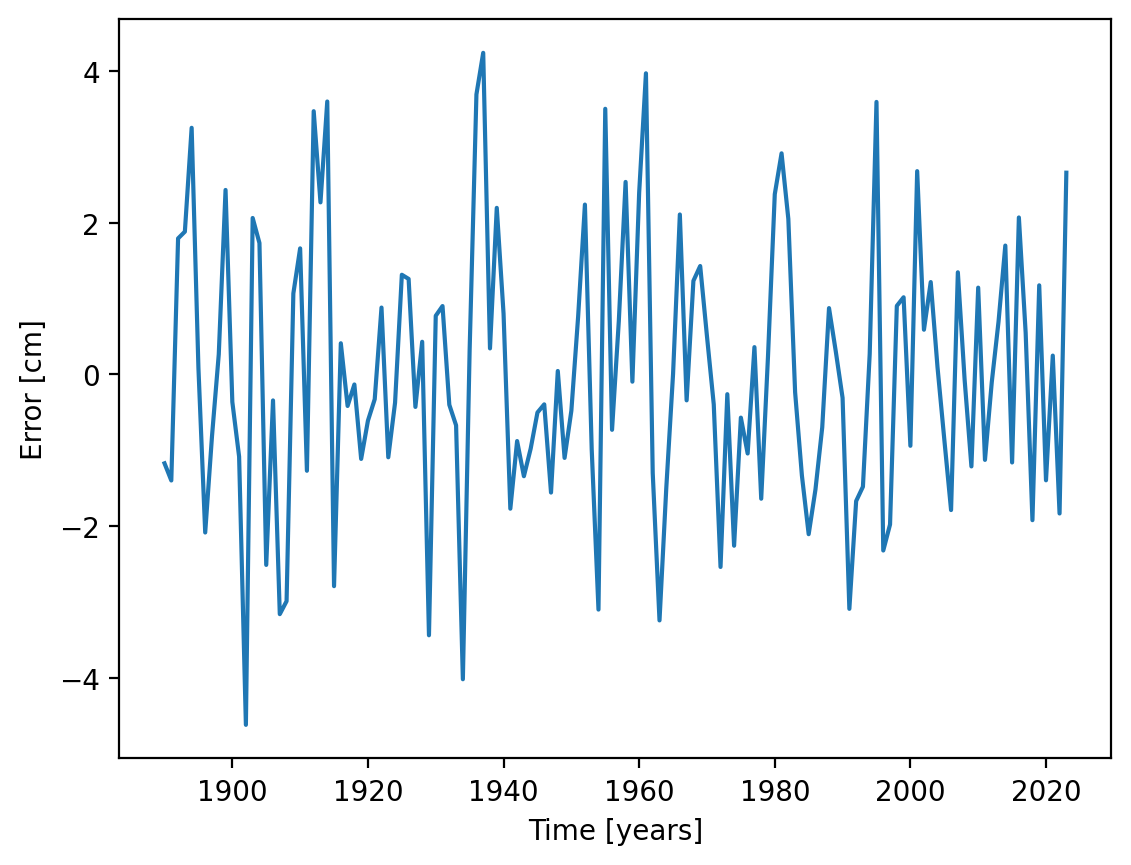

In [79]:
mod_error = tg_df.loc[:,'Average']-res_na.loc[:, 'total']

mod_error.plot()
plt.xlabel('Time [years]')
plt.ylabel('Error [cm]')

plt.savefig(f'./figures/{region}/Error_W_model.pdf', dpi=150)

Text(0, 0.5, 'Error [cm]')

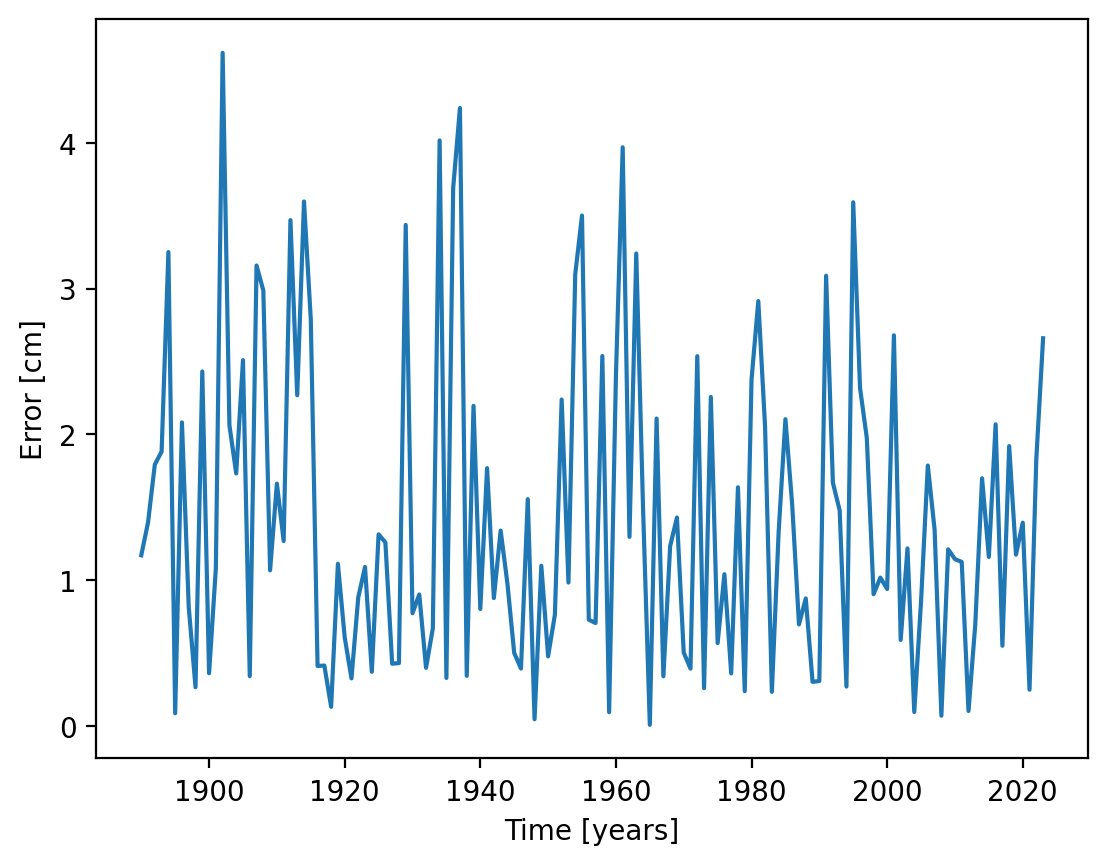

In [80]:
mod_error_abs = np.abs(mod_error)

mod_error_abs.plot()
plt.xlabel('Time [years]')
plt.ylabel('Error [cm]')

Text(0, 0.5, 'Error [cm]')

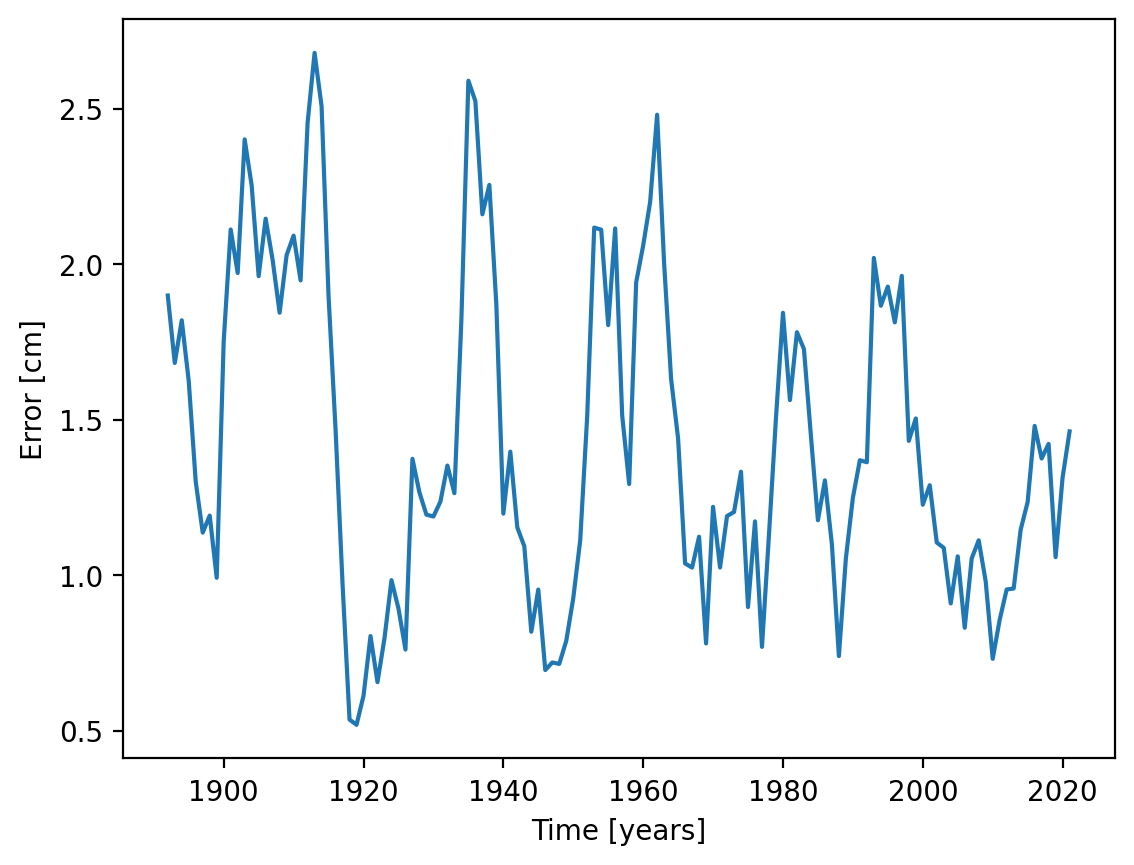

In [81]:
mod_error_abs_ra = mod_error_abs.rolling(window=5, center=True).mean()

mod_error_abs_ra.plot()
plt.xlabel('Time [years]')
plt.ylabel('Error [cm]')

## Compare the error and the wind effect itself

In [82]:
res_na

,nod1,nod2,u2_mean,v2_mean,trend,total,total_nodal,total_wind,rate_slr
time,,,,,,,,,
1890,1.175243,0.000000,1.416397,0.049509,-14.297165,-11.656017,1.175243,1.465905,NaN
1891,1.108915,0.273558,2.692195,0.198394,-14.136490,-9.863429,1.382472,2.890589,1.605920
1892,0.917418,0.516238,0.797400,-0.059044,-13.975981,-11.803969,1.433655,0.738356,1.603299
1893,0.622367,0.700647,2.969929,0.063167,-13.815830,-9.459720,1.323014,3.033097,1.599632
1894,0.257066,0.805971,1.748762,0.049004,-13.656054,-10.795252,1.063037,1.797766,1.596310
...,...,...,...,...,...,...,...,...,...
2019,1.065395,-0.348674,4.866365,0.319642,10.478263,16.380991,0.716720,5.186007,3.125343
2020,1.169577,-0.081007,7.112012,0.509351,10.791031,19.500964,1.088570,7.621363,3.129834
2021,1.141743,0.195804,3.267765,0.031162,11.104230,15.740704,1.337547,3.298928,3.133799


Text(0, 0.5, 'Model error [cm]')

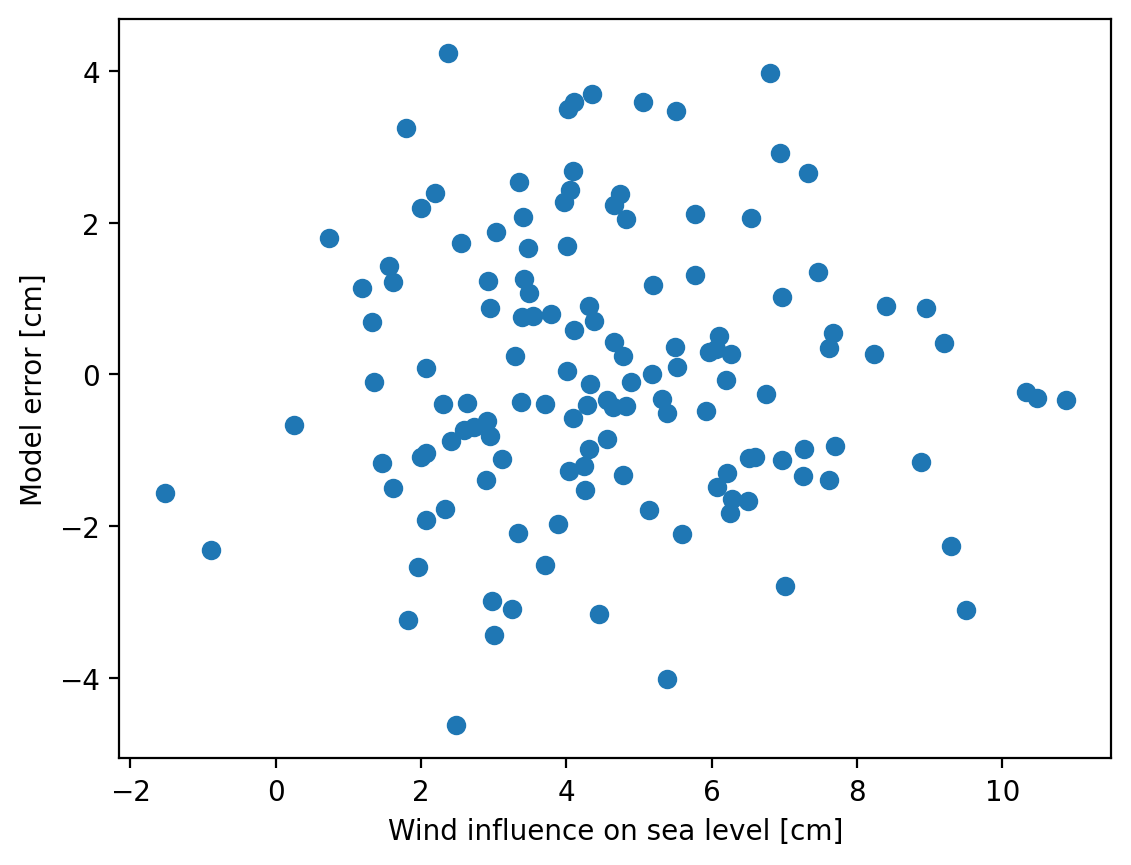

In [83]:
plt.scatter(res_na['total_wind'], mod_error)

plt.xlabel('Wind influence on sea level [cm]')
plt.ylabel('Model error [cm]')

Text(0, 0.5, 'Model error [cm]')

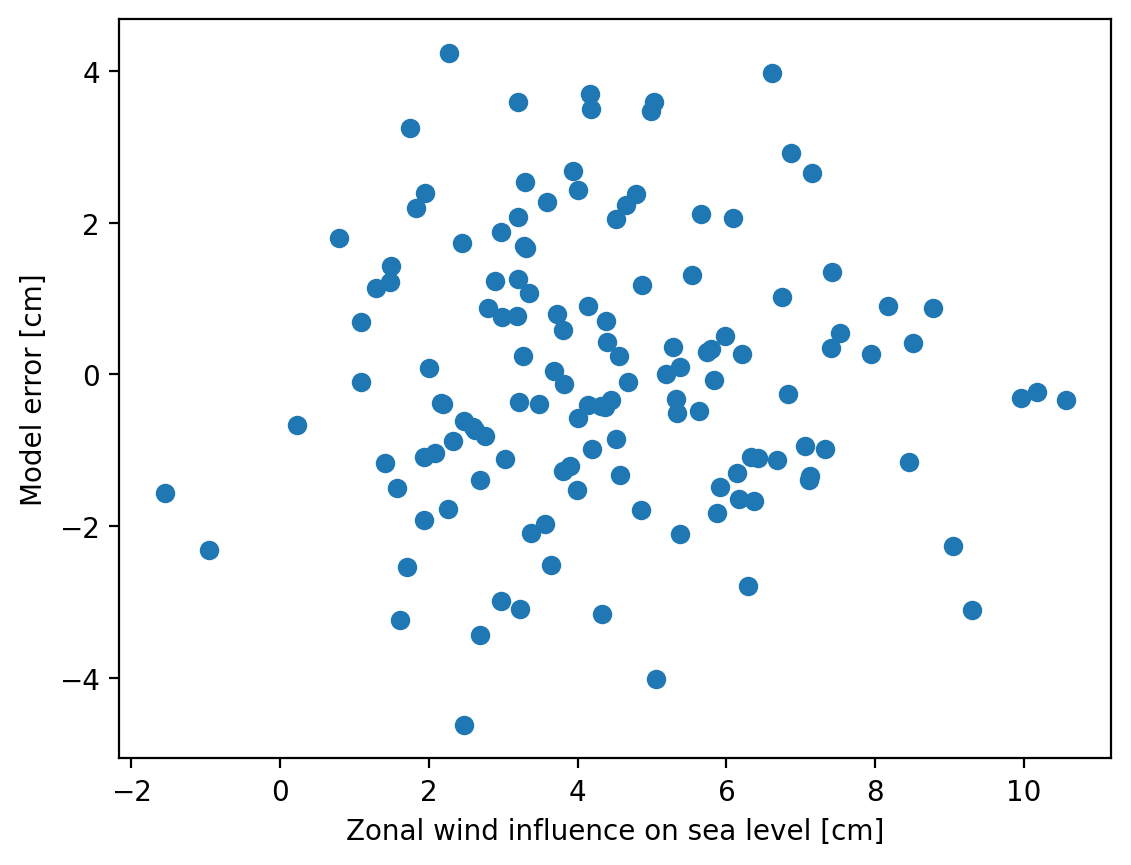

In [84]:
plt.scatter(res_na['u2_mean'], mod_error)

plt.xlabel('Zonal wind influence on sea level [cm]')
plt.ylabel('Model error [cm]')

Text(0, 0.5, 'Model error [cm]')

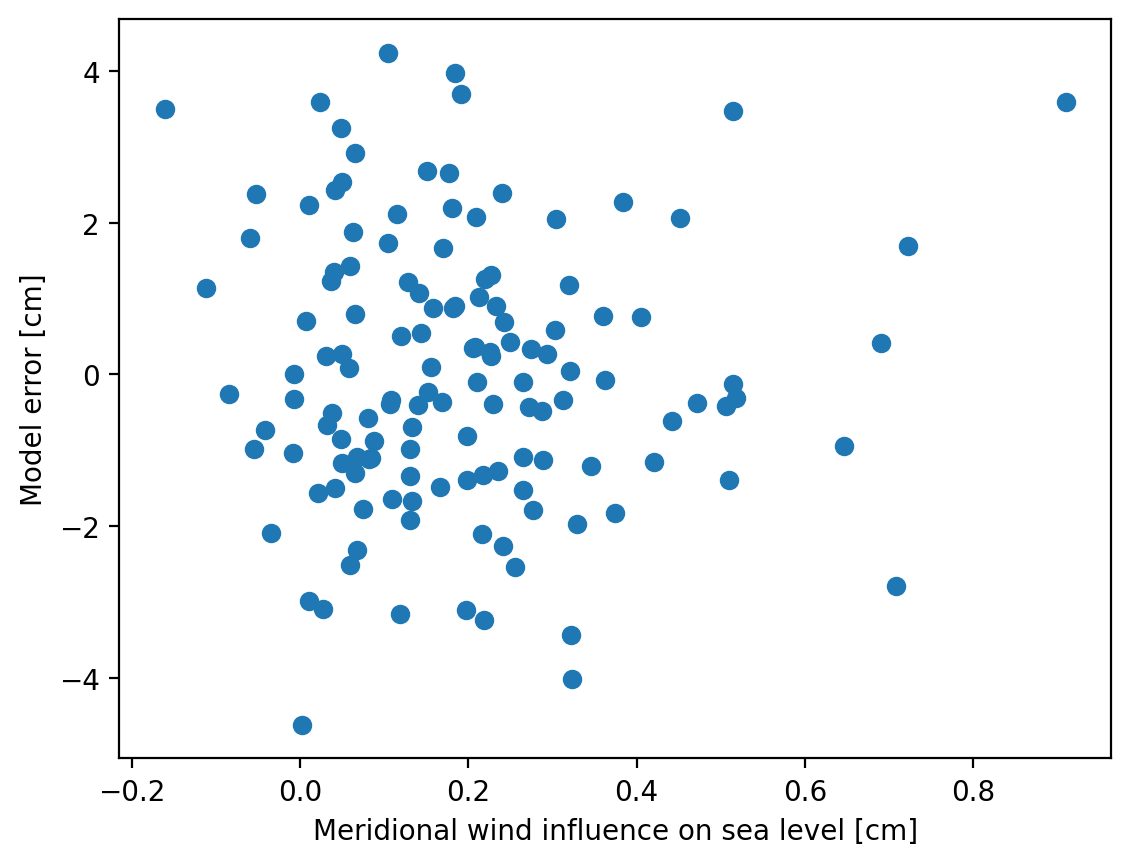

In [85]:
plt.scatter(res_na['v2_mean'], mod_error)

plt.xlabel('Meridional wind influence on sea level [cm]')
plt.ylabel('Model error [cm]')

## Compare with KNMI'23 projections

### Read KNMI'23 data

In [86]:
Projects_dir = '/Users/dewilebars/Projects/'
ProbSLR_dir = f'{Projects_dir}Project_ProbSLR/SLProj/'
proj_data_dir = f'{ProbSLR_dir}/outputs/KNMI23/'

KNMI23_ssp126 = xr.open_dataset(f'{proj_data_dir}SeaLevelPerc_KNMI23_ssp126_v19.nc')
KNMI23_ssp245 = xr.open_dataset(f'{proj_data_dir}SeaLevelPerc_KNMI23_ssp245_v19.nc')
KNMI23_ssp585 = xr.open_dataset(f'{proj_data_dir}SeaLevelPerc_KNMI23_ssp585_v19.nc')

KNMI23_ssp126 = KNMI23_ssp126.perc_ts
KNMI23_ssp245 = KNMI23_ssp245.perc_ts
KNMI23_ssp585 = KNMI23_ssp585.perc_ts

In [87]:
# Specify official KNMI'23 colors
rgb_red = '#d52b1e'
rgb_orange = '#f68e64'
rgb_yellow = '#fec35e'

### Prepare tide gauge data

In [88]:
tg_shifted_df = tg_df['Average'].copy()
# Shift index for comparison with scenarios e.g. the average of year 2000 is moved to 2000.5
tg_shifted_df.index = tg_shifted_df.index + 0.5

tg_19ra = tg_shifted_df.rolling(19, center=True).mean()
ref = (tg_19ra.loc[1995.5]+tg_19ra.loc[1994.5])/2

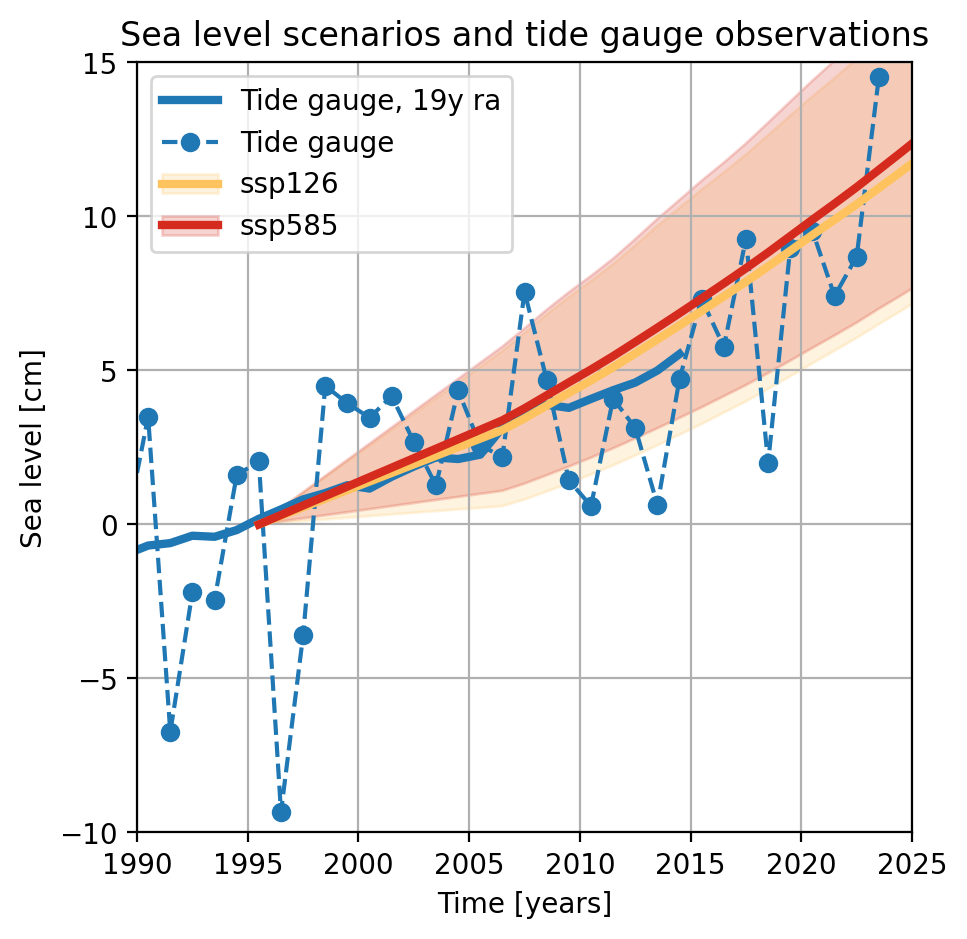

In [91]:
#Plot time series
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(tg_19ra - ref, '-', color='tab:blue', label='Tide gauge, 19y ra', linewidth=3)
ax.plot(tg_shifted_df - ref, 'o--', color='tab:blue', label='Tide gauge')


KNMI23_ssp126.sel(proc='Total', percentiles=['50']).plot(color=rgb_yellow, linestyle='-', label='KNMI23', linewidth=3)

ax.fill_between(KNMI23_ssp126.time, 
                KNMI23_ssp126.sel(proc='Total', percentiles=['5']).data[0], 
                KNMI23_ssp126.sel(proc='Total', percentiles=['95']).data[0], 
                color=rgb_yellow, 
                alpha=0.2,
                label='ssp126')

KNMI23_ssp585.sel(proc='Total', percentiles=['50']).plot(color=rgb_red, linestyle='-', label='KNMI23', linewidth=3)

ax.fill_between(KNMI23_ssp585.time, 
                KNMI23_ssp585.sel(proc='Total', percentiles=['5']).data[0], 
                KNMI23_ssp585.sel(proc='Total', percentiles=['95']).data[0], 
                color=rgb_red, 
                alpha=0.2,
                label='ssp585')

# Adjust the legend
handles, labels = ax.get_legend_handles_labels()

handles[2] = (handles[2], handles[3])
handles[3] = (handles[4], handles[5])

labels[2] = 'ssp126'
labels[3] = 'ssp585'

handles = handles[0:4]
labels = labels[0:4]

ax.legend(handles, labels)

ax.set_xlim([1990,2025])
ax.set_ylim([-10,15])
plt.xlabel('Time [years]')
plt.ylabel('Sea level [cm]')
plt.title('Sea level scenarios and tide gauge observations')
ax.grid(True)

plt.savefig('./figures/CompObsScen_KNMI23_updated.pdf', dpi=150)